<a href="https://colab.research.google.com/github/yohanesnuwara/numerical-method/blob/master/quantum-computing/quantum_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

Install qiskit for quantum computing, more or less take 1.5 minute to install

In [0]:
!pip install qiskit

In [0]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## First quantum circuit

In [0]:
n = 8
n_q = 8 # number of qubits in the circuit
n_b = 8 # number of output bits we will extract from the circuit at the end
qc_output = QuantumCircuit(n_q,n_b)

Put measurement and visualize the circuit

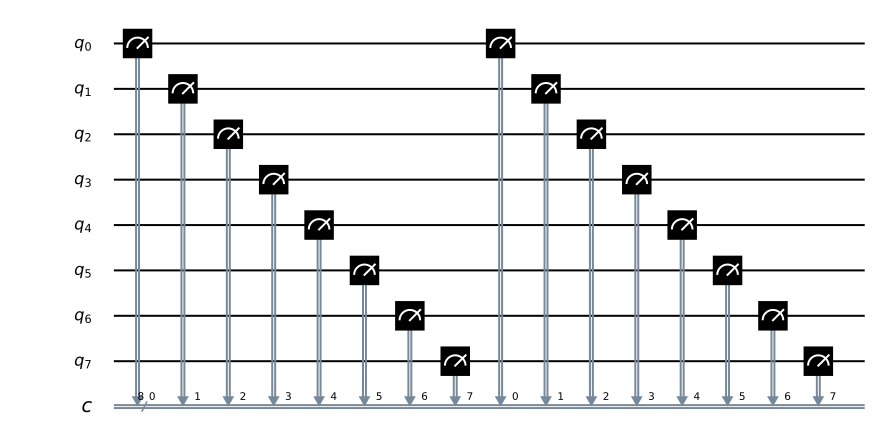

In [29]:
for j in range(n):
    qc_output.measure(j,j)
qc_output.draw(output='mpl')

# ***

In [24]:
# represent ordinal number to ordinary bits
bit = [0, 1]

multiples = []
for i in range(20):
  multipl = 2**i
  multiples.append(float(multipl))

number = 9213

jarr = []
for j in range(len(multiples)):
  if number > multiples[j]:
    jarr.append(float(j))
# print(jarr)

diff = number - 2**jarr[-1]
diff

1021.0